# Exploratory Analysis and Visualization of Cancer Data

# Table of Contents

1. [Introduction](#introduction)
2. [Import Necessary Libraries](#import_libraries)
3. [Load the Cancer Dataset](#load_dataset)
4. [Dataset Summary Statistics](#dataset_summary_statistics)
5. [Data Normalization](#data_normalization)
6. [Visualize the Normalized Data](#visualize_normalized_data)
7. [Log the Dataset to wandb](#log_dataset_wandb)

***

## Introduction

The 'Cancer Data' dataset by Erdemtaha on Kaggle contains information on breast cancer patients and characteristics associated with their disease. The dataset includes 569 instances with 31 features. The features are as follows:

1. **id**: A unique identifier for each patient.
2. **diagnosis**: The response variable indicating whether the tumor is benign (B) or malignant (M).
3. **mean radius**: The mean of distances from the center to points on the perimeter of the tumor.
4. **mean texture**: The standard deviation of gray-scale values in the image.
5. **mean perimeter**: The average size of the perimeter of the tumor.
6. **mean area**: The average area of the tumor.
7. **mean smoothness**: The local variation in radius lengths of the tumor.
8. **mean compactness**: The perimeter squared divided by the area - 1.0.
9. **mean concavity**: The severity of concave portions of the contour.
10. **mean concave points**: The number of concave portions of the contour.
11. **mean symmetry**: The symmetry of the tumor.
12. **mean fractal dimension**: "coastline approximation" - 1.
13. **radius SE**: The standard error of distances from the center to points on the perimeter of the tumor.
14. **texture SE**: The standard error of gray-scale values in the image.
15. **perimeter SE**: The standard error of the size of the perimeter of the tumor.
16. **area SE**: The standard error of the area of the tumor.
17. **smoothness SE**: The standard error of the local variation in radius lengths of the tumor.
18. **compactness SE**: The standard error of the perimeter squared divided by the area - 1.0.
19. **concavity SE**: The standard error of the severity of concave portions of the contour.
20. **concave points SE**: The standard error of the number of concave portions of the contour.
21. **symmetry SE**: The standard error of the symmetry of the tumor.
22. **fractal dimension SE**: The standard error of "coastline approximation" - 1.
23. **worst radius**: The "worst" (largest) mean value for the distances from the center to points on the perimeter of the tumor.
24. **worst texture**: The "worst" (largest) value for standard deviation of gray-scale values in the image.
25. **worst perimeter**: The "worst" (largest) value for the size of the perimeter of the tumor.
26. **worst area**: The "worst" (largest) value for the area of the tumor.
27. **worst smoothness**: The "worst" (largest) value for the local variation in radius lengths of the tumor.
28. **worst compactness**: The "worst" (largest) value for the perimeter squared divided by the area - 1.0.
29. **worst concavity**: The "worst" (largest) value for the severity of concave portions of the contour.
30. **worst concave points**: The "worst" (largest) value for the number of concave portions of the contour.
31. **worst symmetry**: The "worst" (largest) value for the symmetry of the tumor.
32. **worst fractal dimension**: The "worst" (largest) value for "coastline approximation" - 1.

In summary, the features in the dataset include information about the shape, size, and texture of tumors, as well as the symmetry and "roughness" of the tumor perimeter. There are also features describing the variability of these measurements and the "worst" (largest) measurements associated with each tumor. These features can be used to predict whether a tumor is benign or malignant.


<a id='import_libraries'></a>
## 1. Import Necessary Libraries


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import wandb
from sklearn.preprocessing import StandardScaler

<a id='load_dataset'></a>
## 2. Load the Cancer Dataset


In [38]:
# Read the CSV file and set the index column
data=pd.read_csv("data/Cancer_Data.csv", index_col=0)

In [40]:
# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
data.head()

First 5 rows of the dataset:


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<a id='dataset_summary_statistics'></a>
## 3. Dataset Summary Statistics


In [41]:
# Generate summary statistics of the dataset
print("Dataset summary statistics:")
data.describe()

Dataset summary statistics:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


<a id='data_normalization'></a>
## 4. Data Normalization


In [42]:
# Normalize the dataset using the StandardScaler
scaler = StandardScaler()
data_norm = scaler.fit_transform(data[data.columns[1:-1]])

<a id='visualize_normalized_data'></a>
## 5. Visualize the Normalized Data


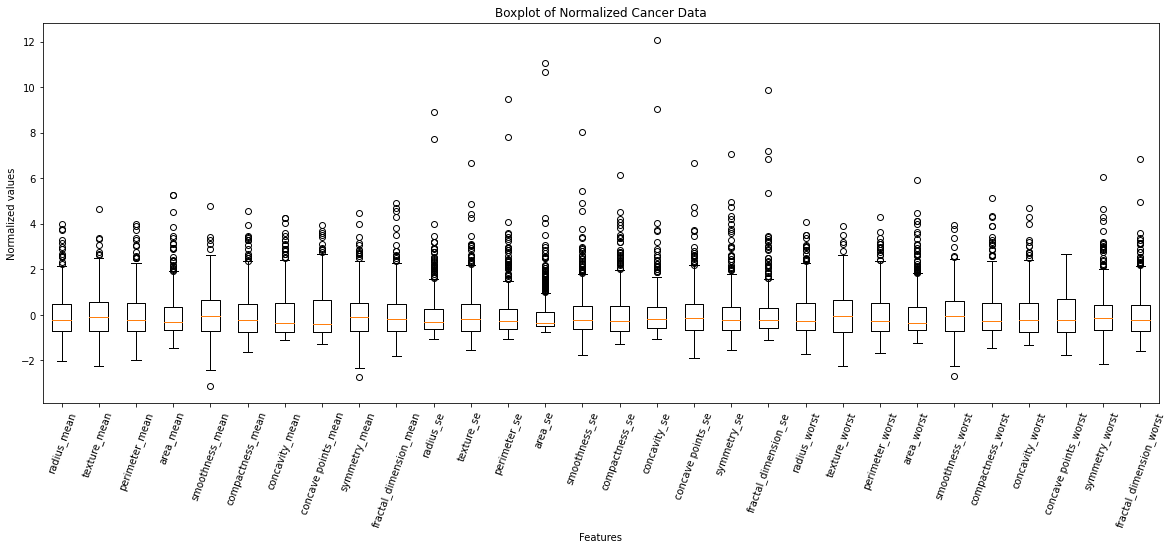

In [51]:
# Create a boxplot of the normalized dataset
fig, ax = plt.subplots(figsize=(20, 7))
ax.boxplot(data_norm)

# Set the title and labels for the boxplot
ax.set_title("Boxplot of Normalized Cancer Data")
ax.set_xlabel("Features")
ax.set_ylabel("Normalized values")

# Set the x-axis tick labels to feature names, rotated vertically
ax.set_xticklabels(data.columns[1:-1], rotation=70)

# Display the boxplot
plt.show()

<a id='log_dataset_wandb'></a>
## 6. Log the Dataset to wandb


In [11]:
# Log in to wandb
wandb.login()

# Initialize a new wandb run
run = wandb.init(entity="saturdays", project="Assignment2", job_type="upload")

# Create a wandb.Table with the cancer dataset (dropping 'Unnamed: 32' column)
my_table = wandb.Table(dataframe=data.drop(columns=['Unnamed: 32']))

# Log the table to wandb
run.log({"Cancer table": my_table})

# Finish the wandb run
run.finish()